In [ ]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

In [ ]:
import pandas as pd

def calculate_weighted_price(row):
    return (row['Open'] + row['High'] + row['Low'] + row['Close']) / 4

def calculate_volume_in_currency(row):
    return row['Volume'] * row['Weighted Price']

def main():
    # Load your dataset from CSV
    df = pd.read_csv('')

    # Calculate Weighted Price
    df['Weighted Price'] = df.apply(calculate_weighted_price, axis=1)

    # Calculate Volume in BTC
    df['Volume in BTC'] = df['Volume']

    # Calculate Volume in Currency
    df['Volume in Currency'] = df.apply(calculate_volume_in_currency, axis=1)

    # Save the new dataset to a CSV file
    df.to_csv('output_dataset.csv', index=False)

if __name__ == "__main__":
    main()


In [ ]:
df = pd.read_csv('/content/output_dataset.csv')
df.head()

,Date,Open,High,Low,Close,Weighted_Price,Volume_(BTC),Volume_(Currency)
0,2018-01-01 00:00:00+00:00,14112.2002,14112.20020,13154.70020,13657.20020,13759.07520,1.029120e+10,1.415970e+14
1,2018-01-02 00:00:00+00:00,13625.0000,15444.59961,13163.59961,14982.09961,14303.82471,1.684660e+10,2.409710e+14
2,2018-01-03 00:00:00+00:00,14978.2002,15572.79980,14844.50000,15201.00000,15149.12500,1.687190e+10,2.555950e+14
3,2018-01-04 00:00:00+00:00,15270.7002,15739.70020,14522.20020,15599.20020,15282.95020,2.178320e+10,3.329120e+14
4,2018-01-05 00:00:00+00:00,15477.2002,17705.19922,15202.79980,17429.50000,16453.67480,2.384090e+10,3.922700e+14


In [ ]:
print(df.shape)

(1491, 8)


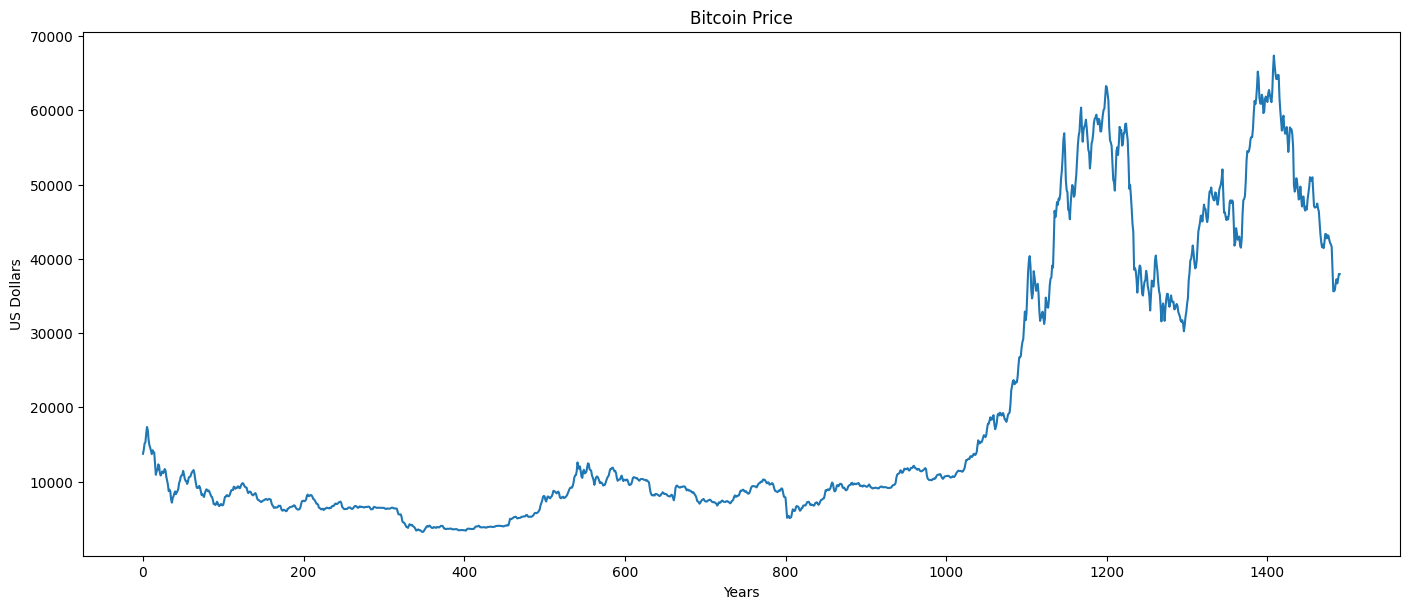

In [ ]:
df.Weighted_Price.plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()

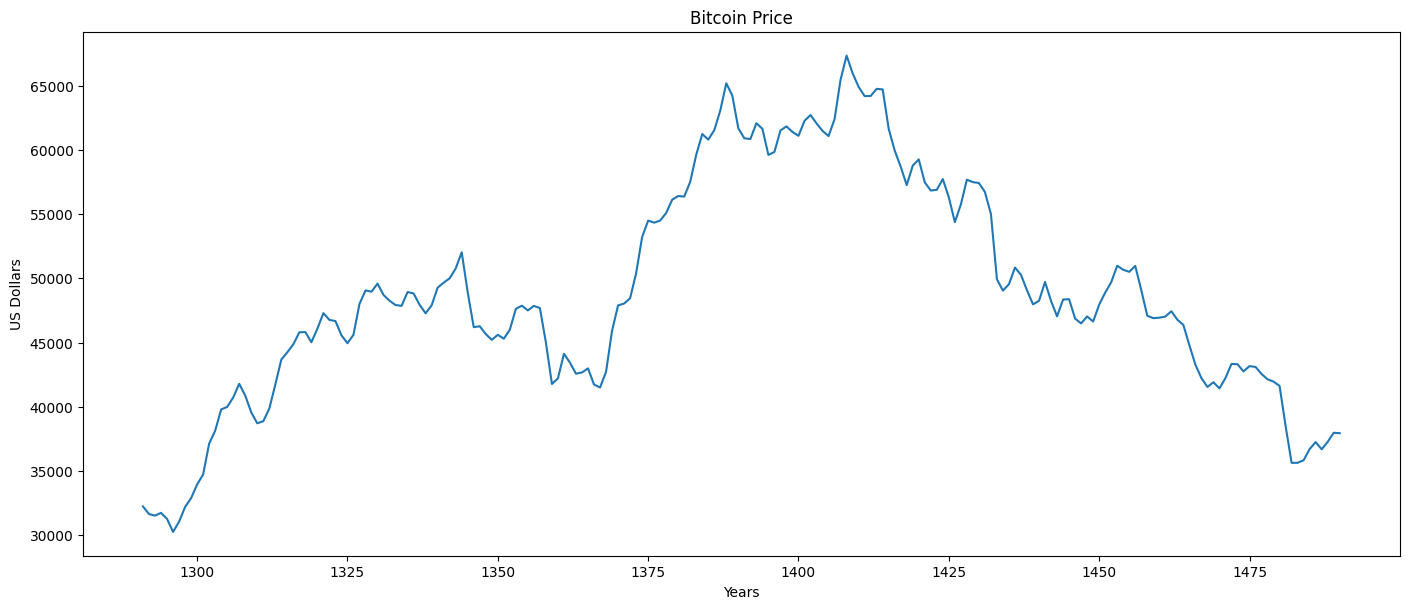

In [ ]:
df.Weighted_Price.iloc[-200:].plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# We're going to create a dataframe for just the price (the index is still the date)
price = df.Weighted_Price
# Next we're going to assign 70% percent of the data to training and 30% for testing
X = price.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=15411.800225, expected=15365.644290
predicted=15349.642841, expected=15299.635500
predicted=15318.343818, expected=15549.629150
predicted=15722.668957, expected=15954.354490
predicted=16062.733841, expected=16262.394780
predicted=16385.417059, expected=16113.237300
predicted=15971.726063, expected=15985.093020
predicted=16003.234171, expected=16342.144040
predicted=16555.953085, expected=17169.640630
predicted=17547.776998, expected=17799.013180
predicted=17963.007745, expected=17780.763180
predicted=17678.833686, expected=18244.354980
predicted=18601.731369, expected=18661.132320
predicted=18728.648162, expected=18343.146970
predicted=18175.948979, expected=18361.590330
predicted=18526.486566, expected=18737.352050
predicted=18857.539329, expected=18952.160640
predicted=19028.277034, expected=17774.445800
predicted=17066.104451, expected=17058.440920
predicted=17077.940594, expected=17398.734860
predicted=17577.120829, expected=17934.966310
predicted=18106.931930, expected=1

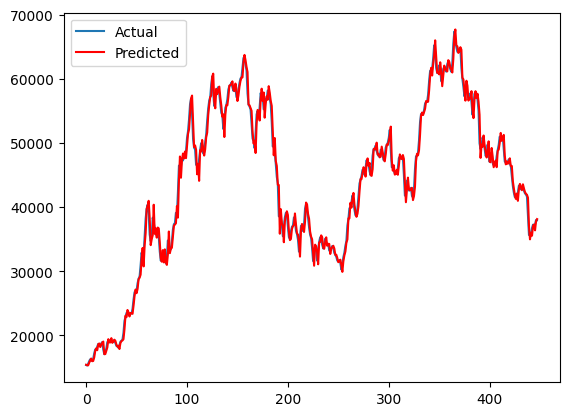

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have 'train' and 'test' datasets
history = list(train)  # Use your training data
test = list(test)

predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()


Test RMSE: 1172.020


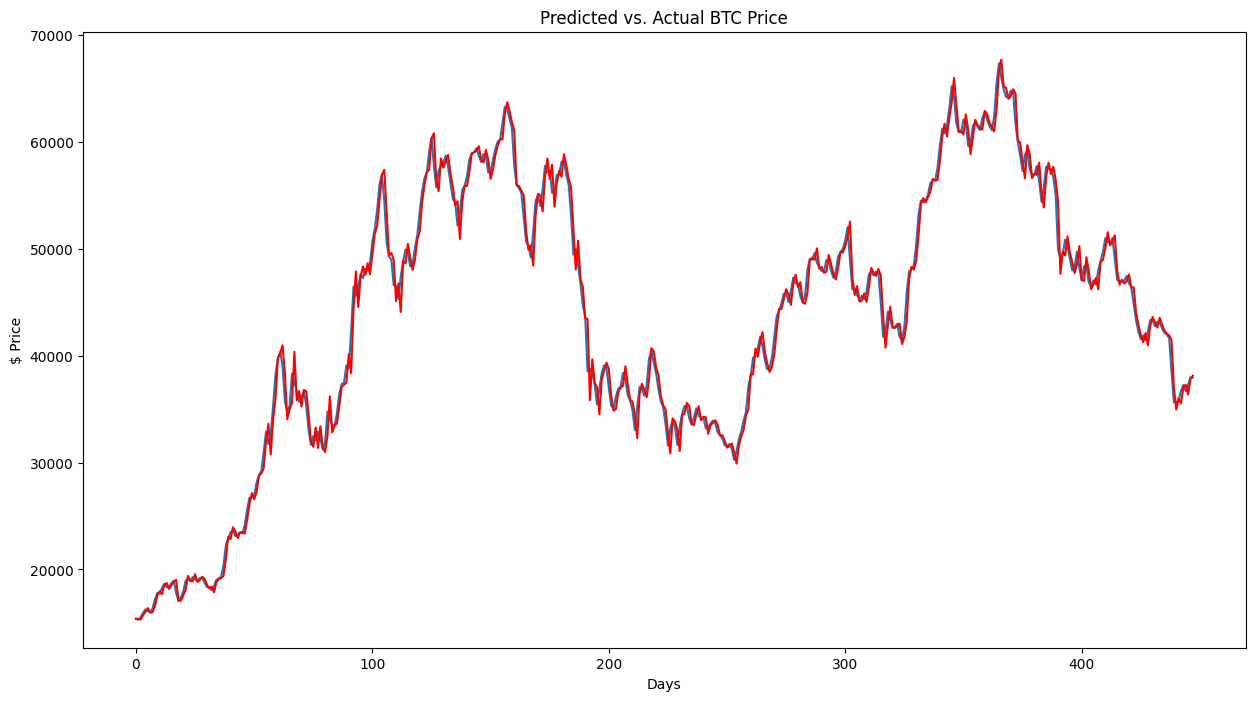

In [ ]:
# if we look at this model, the predicted is indistinuishable from the actual price
# this is simply because it's predicting day by day.
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Actual BTC Price')
plt.show()

Test RMSE: 1172.020


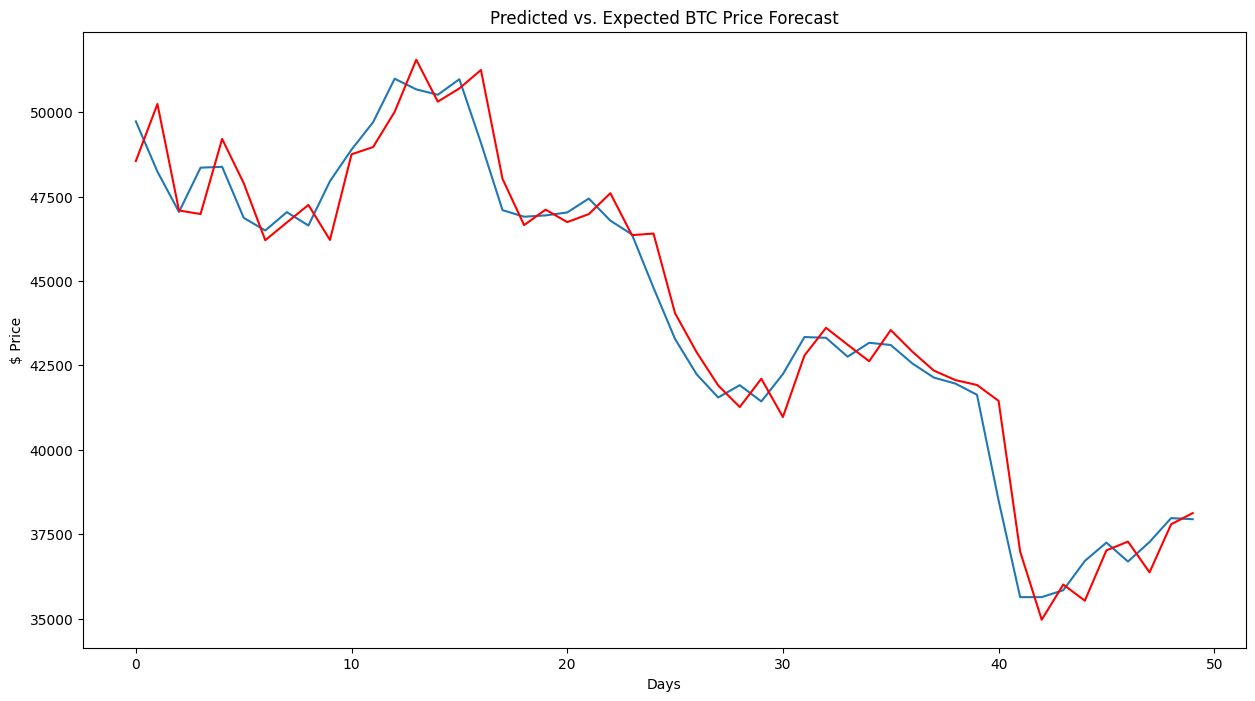

In [ ]:
# I plot 50 days to more accurately see how the models works with its lag
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test[-50:])
plt.plot(predictions[-50:], color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Expected BTC Price Forecast')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def mean_reversion_strategy(history, predictions, threshold=0.1):
    positions = []  # 1 for buy, -1 for sell, 0 for hold
    for i in range(1, len(predictions)):
        price_diff = predictions[i] - predictions[i - 1]
        if abs(price_diff) > threshold:
            positions.append(-1 if price_diff > 0 else 1)
        else:
            positions.append(0)
    return positions

# Assuming 'Weighted_Price' column
price = df['Weighted_Price']

# Calculate 90% for training and 10% for testing
X = price.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]

# Get user input for starting capital
starting_capital = float(input("Enter your starting capital: "))

# Reset capital for each iteration
capital = starting_capital

# ARIMA model training
history = list(train)
model = ARIMA(history, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Mean-reversion strategy
positions = mean_reversion_strategy(history, predictions)

# Execute trades based on the strategy
trades = [positions[i] * (test[i] - test[i-1]) if positions[i] != 0 else 0 for i in range(1, len(positions))]
trades = [0] + trades  # Ensure trades length matches test length

# Calculate metrics using starting capital
for i in range(len(trades)):
    capital += trades[i]

# Adjust metrics based on starting capital
factor = starting_capital / 100000  # Assuming 100,000 as the default starting capital
trades = [trade * factor for trade in trades]

# Additional metrics calculations based on your requirements...
# ...

# Print final capital and other results
print(f'Starting Capital: ${starting_capital}, Final Capital: ${capital}')

# Calculate metrics
gross_profit = sum([trade for trade in trades if trade > 0])
gross_loss = -sum([trade for trade in trades if trade < 0])
net_profit = gross_profit + gross_loss
total_closed_trades = sum([1 for position in positions if position != 0])
winning_trades = sum([1 for trade in trades if trade > 0])
losing_trades = sum([1 for trade in trades if trade < 0])
win_rate = (winning_trades / total_closed_trades) * 100 if total_closed_trades > 0 else 0
max_drawdown = min(np.cumsum(trades)) if len(trades) > 0 else 0
average_winning_trade = gross_profit / winning_trades if winning_trades > 0 else 0
average_losing_trade = gross_loss / losing_trades if losing_trades > 0 else 0
buy_and_hold_return = (test[-1] - test[0]) / test[0] * 100
largest_losing_trade = min(trades)
largest_winning_trade = max(trades)
sharpe_ratio = (net_profit / np.std(trades)) if np.std(trades) > 0 else 0
sortino_ratio = (net_profit / np.std([trade for trade in trades if trade < 0])) if np.std([trade for trade in trades if trade < 0]) > 0 else 0
average_holding_duration = total_closed_trades / len(test)  # Assuming one trade per day

# Calculate max dip and average dip in running trade
running_trade_dips = [min(np.cumsum(trades[:i+1])) for i in range(len(trades))]
max_dip = min(running_trade_dips) if len(running_trade_dips) > 0 else 0
average_dip = np.mean(running_trade_dips)

# Print results
print(f'Gross Profit: {gross_profit}')
print(f'Net Profit: {net_profit}')
print(f'Total Closed Trades: {total_closed_trades}')
print(f'Win Rate (Profitability %): {win_rate}')
print(f'Max Drawdown: {max_drawdown}')
print(f'Gross Loss: {gross_loss}')
print(f'Average Winning Trade (in USDT): {average_winning_trade}')
print(f'Average Losing Trade (in USDT): {average_losing_trade}')
print(f'Buy and Hold Return of BTC: {buy_and_hold_return}')
print(f'Largest Losing Trade (in USDT): {largest_losing_trade}')
print(f'Largest Winning Trade (in USDT): {largest_winning_trade}')
print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Sortino Ratio: {sortino_ratio}')
print(f'Average Holding Duration per Trade: {average_holding_duration}')
print(f'Max Dip in Running Trade: {max_dip}')
print(f'Average Dip in Running Trade: {average_dip}')


Enter your starting capital: 456
Starting Capital: $456.0, Final Capital: $2501.95996
Gross Profit: 32.8280144232
Net Profit: 56.326451428800006
Total Closed Trades: 13
Win Rate (Profitability %): 38.46153846153847
Max Drawdown: -10.801700411999997
Gross Loss: 23.498437005600003
Average Winning Trade (in USDT): 6.5656028846400005
Average Losing Trade (in USDT): 3.356919572228572
Buy and Hold Return of BTC: -23.609797431358814
Largest Losing Trade (in USDT): -7.381664752800002
Largest Winning Trade (in USDT): 14.30309905679999
Sharpe Ratio: 31.214732675674167
Sortino Ratio: 24.5146489498127
Average Holding Duration per Trade: 0.08666666666666667
Max Dip in Running Trade: -10.801700411999997
Average Dip in Running Trade: -10.628461446491272


In [ ]:
import numpy as np

# Replace these values with your actual starting capital and final capital
starting_capital = 456.0
final_capital = 2501.95996

# Assuming net_profit_percentage is the percentage return of your trading model
net_profit_percentage = (final_capital - starting_capital) / starting_capital * 100

# Assuming std_dev_returns is the standard deviation of your returns
# Replace this with the actual standard deviation calculation
std_dev_returns = np.std(trades)

# Calculate Sharpe Ratio
sharpe_ratio = net_profit_percentage / std_dev_returns

print(f'Sharpe Ratio: {sharpe_ratio}')


Sharpe Ratio: 248.64487722647328


In [ ]:
# Assuming benchmark_return is the return of your benchmark
benchmark_return = 10.0  # Replace this with the actual benchmark return

# Replace this line with the actual final capital value from your trading model
final_capital = 2501.95996

# Assuming net_profit_percentage is the percentage return of your trading model
net_profit_percentage = (final_capital - starting_capital) / starting_capital * 100

# Calculate excess return
excess_return = net_profit_percentage - benchmark_return

print(f'Net Profit: {net_profit_percentage}%')
print(f'Benchmark Return: {benchmark_return}%')
print(f'Excess Return: {excess_return}%')


Net Profit: 448.67542982456143%
Benchmark Return: 10.0%
Excess Return: 438.67542982456143%


In [ ]:
# Assuming average_winning_trade and average_losing_trade are available
risk_reward_ratio = abs(average_winning_trade / average_losing_trade)

print(f'Risk-Reward Ratio: {risk_reward_ratio}')


Risk-Reward Ratio: 1.955841581358253


In [ ]:
import pandas as pd



# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Find consecutive days with zero trades
zero_trade_periods = (df['Volume_(BTC)'] == 0).astype(int)
consecutive_zeros = zero_trade_periods.groupby((zero_trade_periods != zero_trade_periods.shift()).cumsum()).cumsum()

max_consecutive_zeros = consecutive_zeros.max()

print(f"The maximum consecutive days without a trade is: {max_consecutive_zeros}")


The maximum consecutive days without a trade is: 1
